In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from tqdm.auto import trange
import pandas as pd

In [29]:
#Predicting how worse the diabetes will get within the next year
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [30]:
X=pd.DataFrame.from_records(diabetes_X)

In [31]:
def h(theta_0, thetas, x):
    return theta_0 + np.dot(thetas, x)

In [32]:
#Cost function
def J(theta_0, thetas, m):
    tmp=0
    for i in range(0,m):
        tmp+=np.square((h(theta_0, thetas, X.iloc[i])-diabetes_y[i]))
    
    return (1/(2*m))*tmp 
    

In [65]:
alpha= 0.3

In [66]:
def dvj_sum(theta_0, thetas, m, j):
    tmp=0
    for i in range(0,m):
        tmp+=(h(theta_0, thetas, X.iloc[i])-diabetes_y[i])*X.iloc[i,j]
    
    return alpha*(1/(m))*tmp 

In [67]:
def GD (theta_0, thetas):
    theta_0 = theta_0 - dvj_sum(theta_0, thetas, len(X), 0)
    for j in range(len(thetas)):
        thetas[j] = thetas[j] - dvj_sum(theta_0, thetas, len(X), j)
    return theta_0, thetas

In [68]:
# #Mean normalization 
# avg=np.mean(diabetes_y)
# std=np.std (diabetes_y)
# for i in range(len(diabetes_y)):
#     diabetes_y[i] =  (diabetes_y[i] - avg)/std
    

In [69]:
theta_0= np.array([1])
thetas = np.random.uniform (-1,1,10)

for x in range (100):
    theta_0 , thetas =GD(theta_0 , thetas)
    print (J(theta_0,thetas, len(X)))


[14348.66811001]
[14311.79723178]
[14275.10121173]
[14238.57918062]
[14202.23027386]
[14166.05363147]
[14130.04839805]
[14094.2137228]
[14058.54875942]
[14023.05266616]
[13987.72460575]
[13952.56374537]
[13917.56925668]
[13882.74031572]
[13848.07610294]
[13813.57580317]
[13779.23860558]
[13745.06370364]
[13711.05029515]
[13677.19758216]
[13643.50477099]
[13609.97107218]
[13576.59570046]
[13543.37787477]
[13510.31681819]
[13477.41175794]
[13444.66192534]
[13412.06655583]
[13379.62488888]
[13347.33616805]
[13315.19964088]
[13283.21455894]
[13251.38017776]
[13219.69575685]
[13188.16055964]
[13156.77385347]
[13125.53490959]
[13094.4430031]
[13063.49741297]
[13032.69742198]
[13002.04231674]
[12971.53138763]
[12941.16392881]
[12910.93923816]
[12880.85661732]
[12850.9153716]
[12821.11481002]
[12791.45424526]
[12761.93299364]
[12732.55037509]
[12703.30571316]
[12674.19833499]
[12645.22757128]
[12616.39275626]
[12587.69322771]
[12559.12832689]
[12530.69739857]
[12502.39979098]
[12474.23485579]


In [70]:
predict = []
for x in range (100):
    predict.append(h(theta_0, thetas, X.iloc[x]))

In [71]:
real = diabetes_y [0:100]

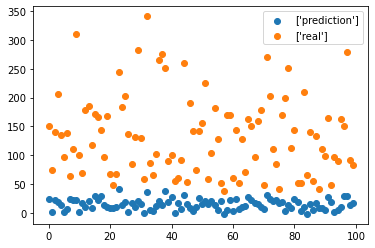

In [72]:
plt.scatter(np.arange(100), predict, label=["prediction"])
plt.scatter(np.arange(100), real, label = ["real"])
plt.legend()

In [53]:
#real

In [54]:
#predict

In [51]:
h(theta_0, thetas, X.iloc[100])

array([31.43448402])

In [52]:
diabetes_y[100]

128.0